# 1. Importing Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading Dataset

In [2]:
df = pd.read_csv(r"data\sepsis_cohort_features.csv")
df.head()

,subject_id,hadm_id,icustay_id,interval_4h,gender,age,ethnicity,weight,height,heart_rate,...,norepinephrine,dopamine,dobutamine,epinephrine,vasopressin,crystalloids,colloids,mechanical_vent,hours_since_icu_admission,mortality_48h_flag
0,4096,124383,201361,2170-07-21 22:11:06 UTC,M,79,BLACK/AFRICAN AMERICAN,100.450001,NaN,98.0,...,0.0,0.0,0.0,0.0,0.0,40.0,0.0,NaN,28,1
1,6912,143307,298739,2196-09-11 17:51:10 UTC,F,24,WHITE,83.599998,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,260,1
2,87552,117940,251622,2170-08-11 10:41:12 UTC,M,47,WHITE,71.850000,129.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,96,0
3,91648,125521,224948,2180-03-26 00:56:43 UTC,M,72,WHITE,78.961111,120.5,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,408,1
4,28160,184274,206157,2179-02-13 01:14:57 UTC,M,79,WHITE,84.699999,NaN,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,250.0,NaN,88,0


# 3. Basic Dataset Information

In [3]:
df.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'interval_4h', 'gender', 'age',
       'ethnicity', 'weight', 'height', 'heart_rate', 'map', 'spo2',
       'respiratory_rate', 'temperature', 'systolic_bp', 'diastolic_bp',
       'gcs_total', 'fio2', 'peep', 'lactate', 'creatinine', 'platelets',
       'bun', 'wbc', 'bicarbonate', 'sodium', 'potassium', 'bilirubin',
       'hematocrit', 'glucose', 'pao2', 'ph', 'pco2', 'norepinephrine',
       'dopamine', 'dobutamine', 'epinephrine', 'vasopressin', 'crystalloids',
       'colloids', 'mechanical_vent', 'hours_since_icu_admission',
       'mortality_48h_flag'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662158 entries, 0 to 662157
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   subject_id                 662158 non-null  int64  
 1   hadm_id                    662158 non-null  int64  
 2   icustay_id                 662158 non-null  int64  
 3   interval_4h                662158 non-null  object 
 4   gender                     662158 non-null  object 
 5   age                        662158 non-null  int64  
 6   ethnicity                  662158 non-null  object 
 7   weight                     591282 non-null  float64
 8   height                     207126 non-null  float64
 9   heart_rate                 372693 non-null  float64
 10  map                        264219 non-null  float64
 11  spo2                       263233 non-null  float64
 12  respiratory_rate           69110 non-null   float64
 13  temperature                34

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
subject_id,662158.0,NaN,NaN,NaN,34775.897774,28555.145413,3.0,12356.0,25076.0,56562.0,99991.0
hadm_id,662158.0,NaN,NaN,NaN,150087.88563,28706.113747,100001.0,125574.0,149686.0,175009.0,199999.0
icustay_id,662158.0,NaN,NaN,NaN,249779.154632,28636.577309,200003.0,224964.0,250198.0,274326.0,299994.0
interval_4h,662158,661900,2161-02-20 14:40:19 UTC,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,662158,2,M,373901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,662158.0,NaN,NaN,NaN,74.40513,50.326997,17.0,55.0,67.0,78.0,311.0
ethnicity,662158,38,WHITE,471368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,591282.0,NaN,NaN,NaN,250.211635,15566.627375,0.0,68.654545,81.650002,97.411111,2060026.075
height,207126.0,NaN,NaN,NaN,117.743978,9.63009,0.0,113.5,118.5,124.0,310.0
heart_rate,372693.0,NaN,NaN,NaN,92.906584,18.835036,0.0,80.0,91.0,105.0,280.0


In [6]:
# missing values count and percentage
missing_values = df.isnull().sum()
missing_values_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_values_percent
})

missing_df = missing_df.sort_values('Percentage', ascending=False)

# Display columns with missing values
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage
hematocrit,603893,91.200741
respiratory_rate,593048,89.562914
peep,527265,79.628276
lactate,505223,76.299463
fio2,497458,75.126782
height,455032,68.719550
bilirubin,430572,65.025568
gcs_total,426561,64.419821
spo2,398925,60.246195
map,397939,60.097288


In [7]:
# columns that have no missing values
columns_without_missing = df.columns[df.isnull().sum() == 0]

df_no_missing = df[columns_without_missing]

print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"New DataFrame shape: {df_no_missing.shape}")
df_no_missing.head()


Original DataFrame shape: (662158, 43)
New DataFrame shape: (662158, 16)


,subject_id,hadm_id,icustay_id,interval_4h,gender,age,ethnicity,norepinephrine,dopamine,dobutamine,epinephrine,vasopressin,crystalloids,colloids,hours_since_icu_admission,mortality_48h_flag
0,4096,124383,201361,2170-07-21 22:11:06 UTC,M,79,BLACK/AFRICAN AMERICAN,0.0,0.0,0.0,0.0,0.0,40.0,0.0,28,1
1,6912,143307,298739,2196-09-11 17:51:10 UTC,F,24,WHITE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260,1
2,87552,117940,251622,2170-08-11 10:41:12 UTC,M,47,WHITE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96,0
3,91648,125521,224948,2180-03-26 00:56:43 UTC,M,72,WHITE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408,1
4,28160,184274,206157,2179-02-13 01:14:57 UTC,M,79,WHITE,0.0,0.0,0.0,0.0,0.0,0.0,250.0,88,0


In [8]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662158 entries, 0 to 662157
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   subject_id                 662158 non-null  int64  
 1   hadm_id                    662158 non-null  int64  
 2   icustay_id                 662158 non-null  int64  
 3   interval_4h                662158 non-null  object 
 4   gender                     662158 non-null  object 
 5   age                        662158 non-null  int64  
 6   ethnicity                  662158 non-null  object 
 7   norepinephrine             662158 non-null  float64
 8   dopamine                   662158 non-null  float64
 9   dobutamine                 662158 non-null  float64
 10  epinephrine                662158 non-null  float64
 11  vasopressin                662158 non-null  float64
 12  crystalloids               662158 non-null  float64
 13  colloids                   66

In [9]:
df_no_missing.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
subject_id,662158.0,NaN,NaN,NaN,34775.897774,28555.145413,3.0,12356.0,25076.0,56562.0,99991.0
hadm_id,662158.0,NaN,NaN,NaN,150087.88563,28706.113747,100001.0,125574.0,149686.0,175009.0,199999.0
icustay_id,662158.0,NaN,NaN,NaN,249779.154632,28636.577309,200003.0,224964.0,250198.0,274326.0,299994.0
interval_4h,662158,661900,2161-02-20 14:40:19 UTC,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,662158,2,M,373901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,662158.0,NaN,NaN,NaN,74.40513,50.326997,17.0,55.0,67.0,78.0,311.0
ethnicity,662158,38,WHITE,471368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
norepinephrine,662158.0,NaN,NaN,NaN,0.005492,0.18835,0.0,0.0,0.0,0.0,76.808
dopamine,662158.0,NaN,NaN,NaN,1.635619,17.223746,0.0,0.0,0.0,0.0,1257.3
dobutamine,662158.0,NaN,NaN,NaN,0.00022,0.018853,0.0,0.0,0.0,0.0,13.063484


### Observation
- For missing values, more exploration and domain knowledge is needed before handling it.
- For perfect columns, first exploration will involve univariate analysis.

# 4. Univariate Analysis for df_no_missing

In [10]:
# Converting subject, hadm and icustay to object as they are identifiers for patients
df_no_missing = df[columns_without_missing].copy()

df_no_missing['subject_id'] = df_no_missing['subject_id'].astype('object')
df_no_missing['hadm_id'] = df_no_missing['hadm_id'].astype('object')
df_no_missing['icustay_id'] = df_no_missing['icustay_id'].astype('object')
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662158 entries, 0 to 662157
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   subject_id                 662158 non-null  object 
 1   hadm_id                    662158 non-null  object 
 2   icustay_id                 662158 non-null  object 
 3   interval_4h                662158 non-null  object 
 4   gender                     662158 non-null  object 
 5   age                        662158 non-null  int64  
 6   ethnicity                  662158 non-null  object 
 7   norepinephrine             662158 non-null  float64
 8   dopamine                   662158 non-null  float64
 9   dobutamine                 662158 non-null  float64
 10  epinephrine                662158 non-null  float64
 11  vasopressin                662158 non-null  float64
 12  crystalloids               662158 non-null  float64
 13  colloids                   66

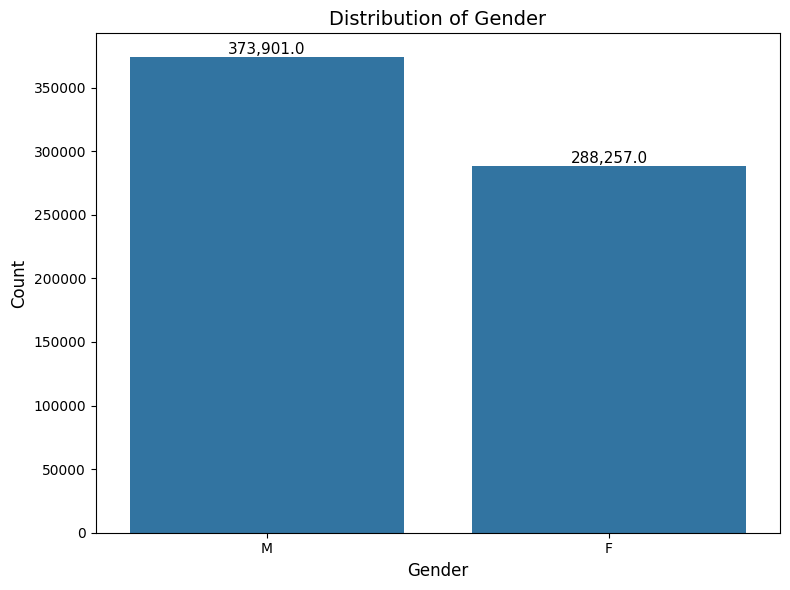

Gender distribution (%):
gender
M    56.467037
F    43.532963
Name: proportion, dtype: float64


In [11]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='gender', data=df_no_missing)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

gender_counts = df_no_missing['gender'].value_counts(normalize=True) * 100
print("Gender distribution (%):")
print(gender_counts)

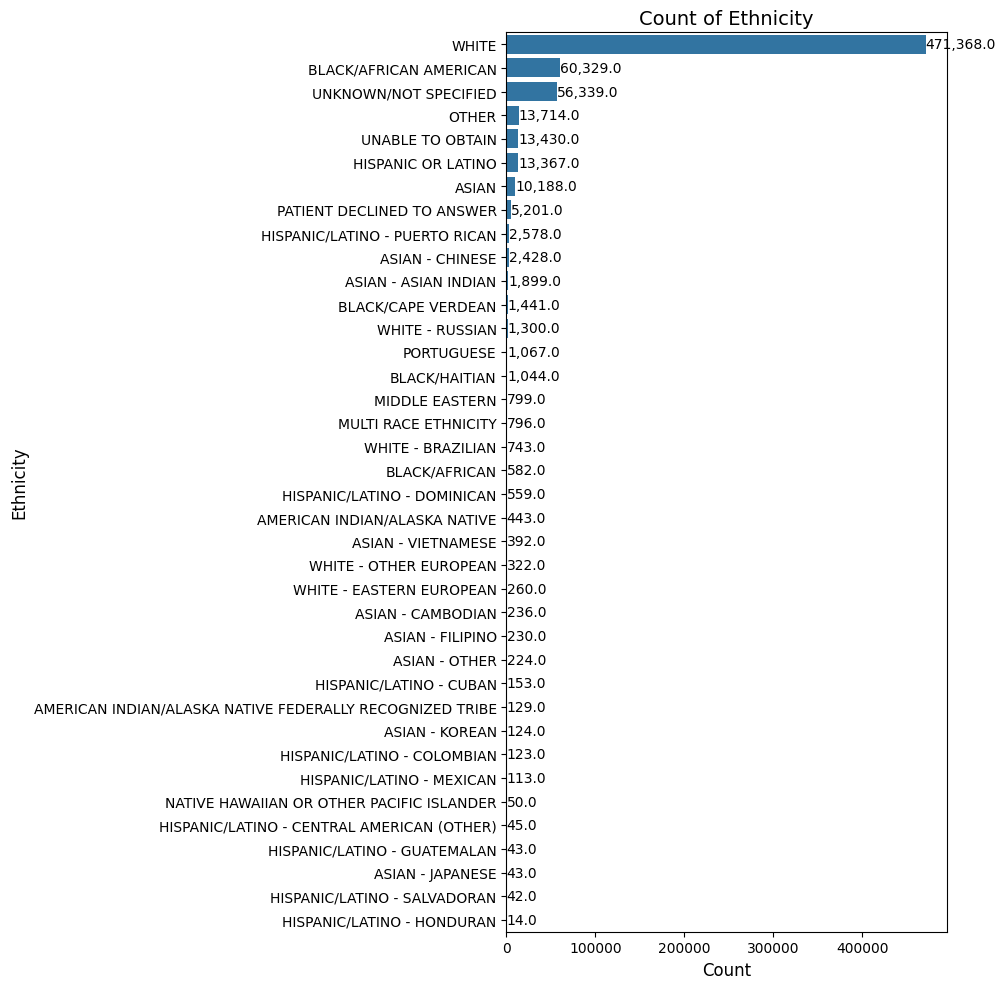

Ethnicity distribution (%):
ethnicity
WHITE                                                       71.186635
BLACK/AFRICAN AMERICAN                                       9.110967
UNKNOWN/NOT SPECIFIED                                        8.508392
OTHER                                                        2.071107
UNABLE TO OBTAIN                                             2.028217
HISPANIC OR LATINO                                           2.018702
ASIAN                                                        1.538606
PATIENT DECLINED TO ANSWER                                   0.785462
HISPANIC/LATINO - PUERTO RICAN                               0.389333
ASIAN - CHINESE                                              0.366680
ASIAN - ASIAN INDIAN                                         0.286790
BLACK/CAPE VERDEAN                                           0.217622
WHITE - RUSSIAN                                              0.196328
PORTUGUESE                                          

In [12]:
plt.figure(figsize=(10, 10))  #

ax = sns.countplot(y='ethnicity', data=df_no_missing, 
                  order=df_no_missing['ethnicity'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_width():,}', 
                (p.get_width() + 5, p.get_y() + p.get_height()/2), 
                ha='left', va='center', fontsize=10)

plt.title('Count of Ethnicity', fontsize=14)
plt.ylabel('Ethnicity', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

ethnicity_counts = df_no_missing['ethnicity'].value_counts(normalize=True) * 100
print("Ethnicity distribution (%):")
print(ethnicity_counts)

Simplified ethnicity distribution (%):
ethnicity_simplified
WHITE                               71.744206
UNKNOWN/OTHER                       13.634057
BLACK                                9.574150
HISPANIC/LATINO                      2.572951
ASIAN                                2.380701
NATIVE AMERICAN/PACIFIC ISLANDER     0.093935
Name: proportion, dtype: float64


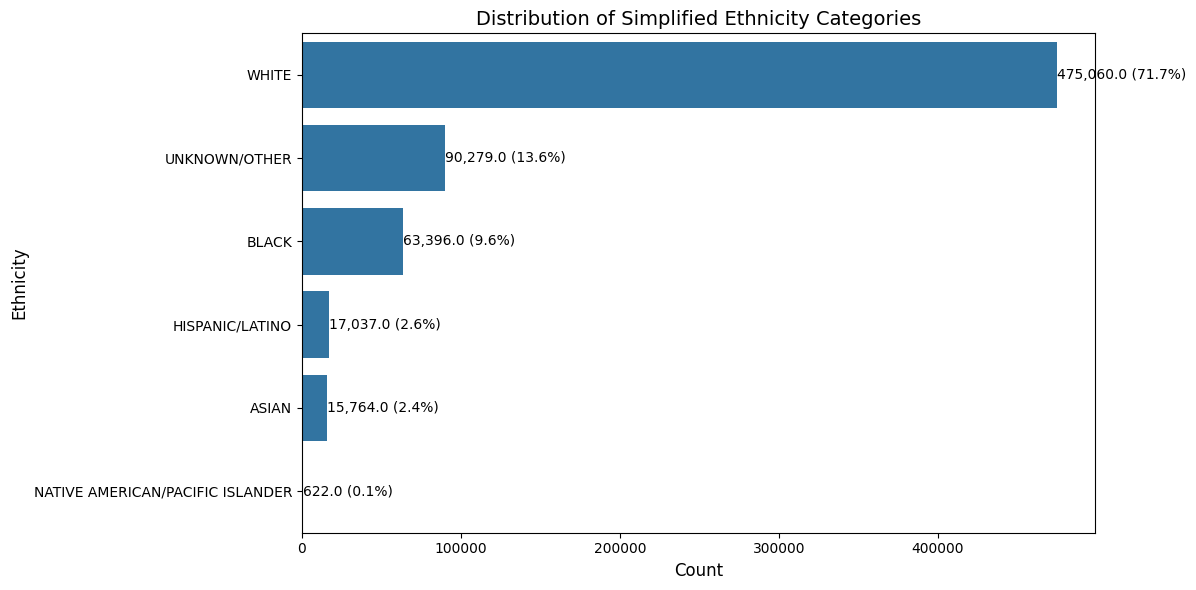

In [13]:
# Defining the mappings for simplified ethnicity categories
ethnicity_mapping = {
    # White categories
    'WHITE': 'WHITE',
    'WHITE - RUSSIAN': 'WHITE',
    'WHITE - BRAZILIAN': 'WHITE',
    'WHITE - OTHER EUROPEAN': 'WHITE',
    'WHITE - EASTERN EUROPEAN': 'WHITE',
    'PORTUGUESE': 'WHITE',
    
    # Black categories
    'BLACK/AFRICAN AMERICAN': 'BLACK',
    'BLACK/CAPE VERDEAN': 'BLACK',
    'BLACK/HAITIAN': 'BLACK',
    'BLACK/AFRICAN': 'BLACK',
    
    # Asian categories
    'ASIAN': 'ASIAN',
    'ASIAN - CHINESE': 'ASIAN',
    'ASIAN - ASIAN INDIAN': 'ASIAN',
    'ASIAN - VIETNAMESE': 'ASIAN',
    'ASIAN - CAMBODIAN': 'ASIAN',
    'ASIAN - FILIPINO': 'ASIAN',
    'ASIAN - OTHER': 'ASIAN',
    'ASIAN - KOREAN': 'ASIAN',
    'ASIAN - JAPANESE': 'ASIAN',
    
    # Hispanic/Latino categories
    'HISPANIC OR LATINO': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - PUERTO RICAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - DOMINICAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - CUBAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - COLOMBIAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - MEXICAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - GUATEMALAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - SALVADORAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - HONDURAN': 'HISPANIC/LATINO',
    
    # Native categories
    'AMERICAN INDIAN/ALASKA NATIVE': 'NATIVE AMERICAN/PACIFIC ISLANDER',
    'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE': 'NATIVE AMERICAN/PACIFIC ISLANDER',
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'NATIVE AMERICAN/PACIFIC ISLANDER',
    
    # Unknown/Other categories
    'UNKNOWN/NOT SPECIFIED': 'UNKNOWN/OTHER',
    'OTHER': 'UNKNOWN/OTHER',
    'UNABLE TO OBTAIN': 'UNKNOWN/OTHER',
    'PATIENT DECLINED TO ANSWER': 'UNKNOWN/OTHER',
    'MIDDLE EASTERN': 'UNKNOWN/OTHER',
    'MULTI RACE ETHNICITY': 'UNKNOWN/OTHER'
}

# Apply the mapping directly to df_no_missing
df_no_missing['ethnicity_simplified'] = df_no_missing['ethnicity'].map(ethnicity_mapping)

# Check the new distribution
ethnicity_counts = df_no_missing['ethnicity_simplified'].value_counts(normalize=True) * 100
print("Simplified ethnicity distribution (%):")
print(ethnicity_counts)

# Visualize the new distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='ethnicity_simplified', data=df_no_missing, 
                  order=df_no_missing['ethnicity_simplified'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_width():,} ({p.get_width()/len(df_no_missing)*100:.1f}%)', 
                (p.get_width() + 5, p.get_y() + p.get_height()/2), 
                ha='left', va='center', fontsize=10)
plt.title('Distribution of Simplified Ethnicity Categories', fontsize=14)
plt.ylabel('Ethnicity', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

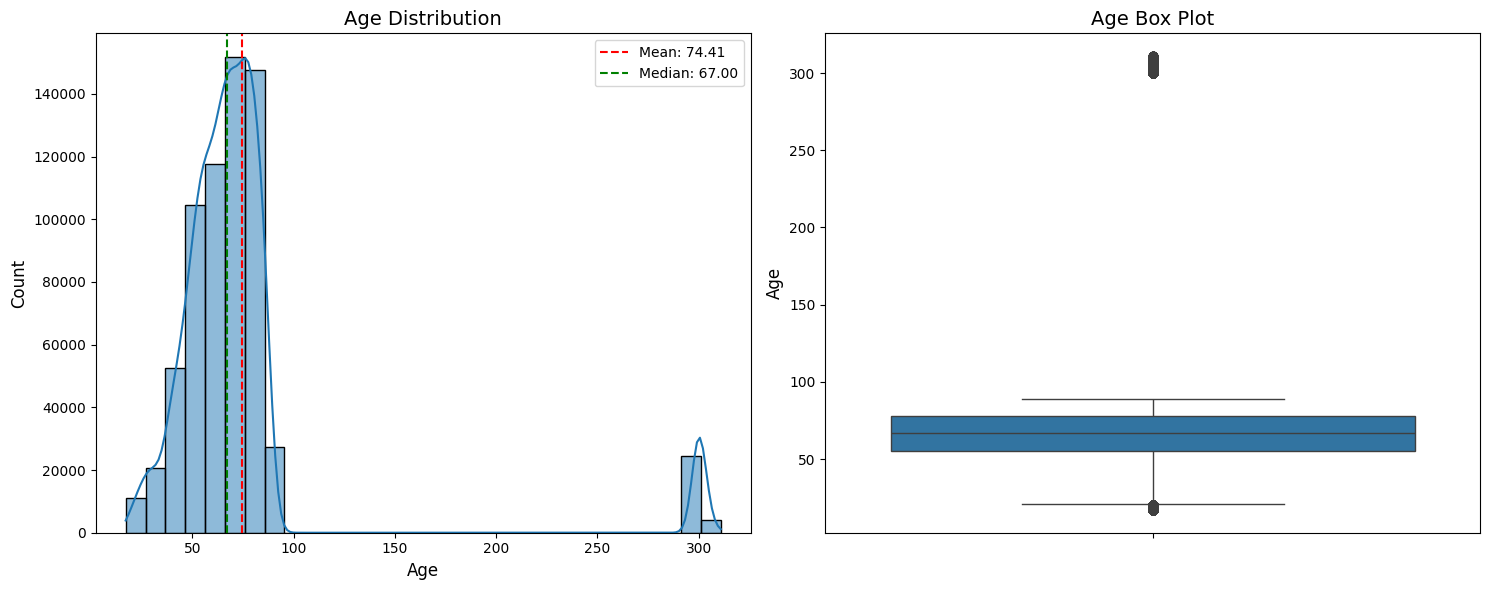

Age tats:
count    662158.000000
mean         74.405130
std          50.326997
min          17.000000
25%          55.000000
50%          67.000000
75%          78.000000
max         311.000000
Name: age, dtype: float64

Age group distribution:
            Count  Percentage (%)
age_group                        
0-18          492        0.077658
19-30       19586        3.091483
31-40       29061        4.587031
41-50       70100       11.064688
51-60      119965       18.935454
61-70      145314       22.936578
71-80      155063       24.475374
81-90       93966       14.831733
91+             0        0.000000


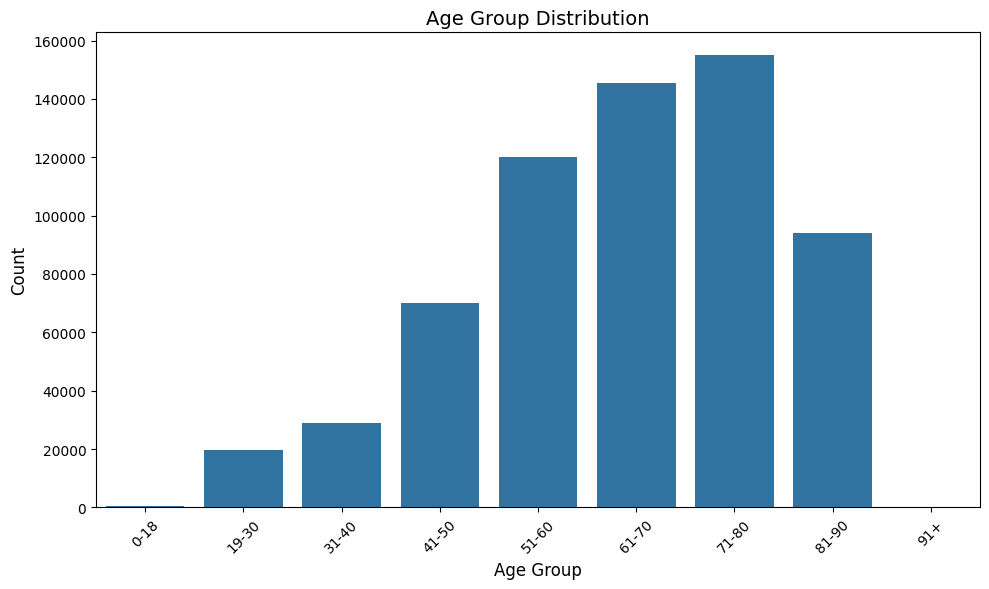

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram with KDE
sns.histplot(df_no_missing['age'], kde=True, bins=30, ax=ax1)
ax1.set_title('Age Distribution', fontsize=14)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# mean and median lines
mean_age = df_no_missing['age'].mean()
median_age = df_no_missing['age'].median()
ax1.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.2f}')
ax1.axvline(median_age, color='green', linestyle='--', label=f'Median: {median_age:.2f}')
ax1.legend()

# Box plot
sns.boxplot(y=df_no_missing['age'], ax=ax2)
ax2.set_title('Age Box Plot', fontsize=14)
ax2.set_ylabel('Age', fontsize=12)

plt.tight_layout()
plt.show()

print("Age tats:")
print(df_no_missing['age'].describe())

age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 120]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
df_no_missing['age_group'] = pd.cut(df_no_missing['age'], bins=age_bins, labels=age_labels)

# Count and percentage by age group
age_group_counts = df_no_missing['age_group'].value_counts().sort_index()
age_group_percent = df_no_missing['age_group'].value_counts(normalize=True).sort_index() * 100

age_distribution = pd.DataFrame({
    'Count': age_group_counts,
    'Percentage (%)': age_group_percent
})

print("\nAge group distribution:")
print(age_distribution)

# Plot age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df_no_missing, order=age_labels)
plt.title('Age Group Distribution', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

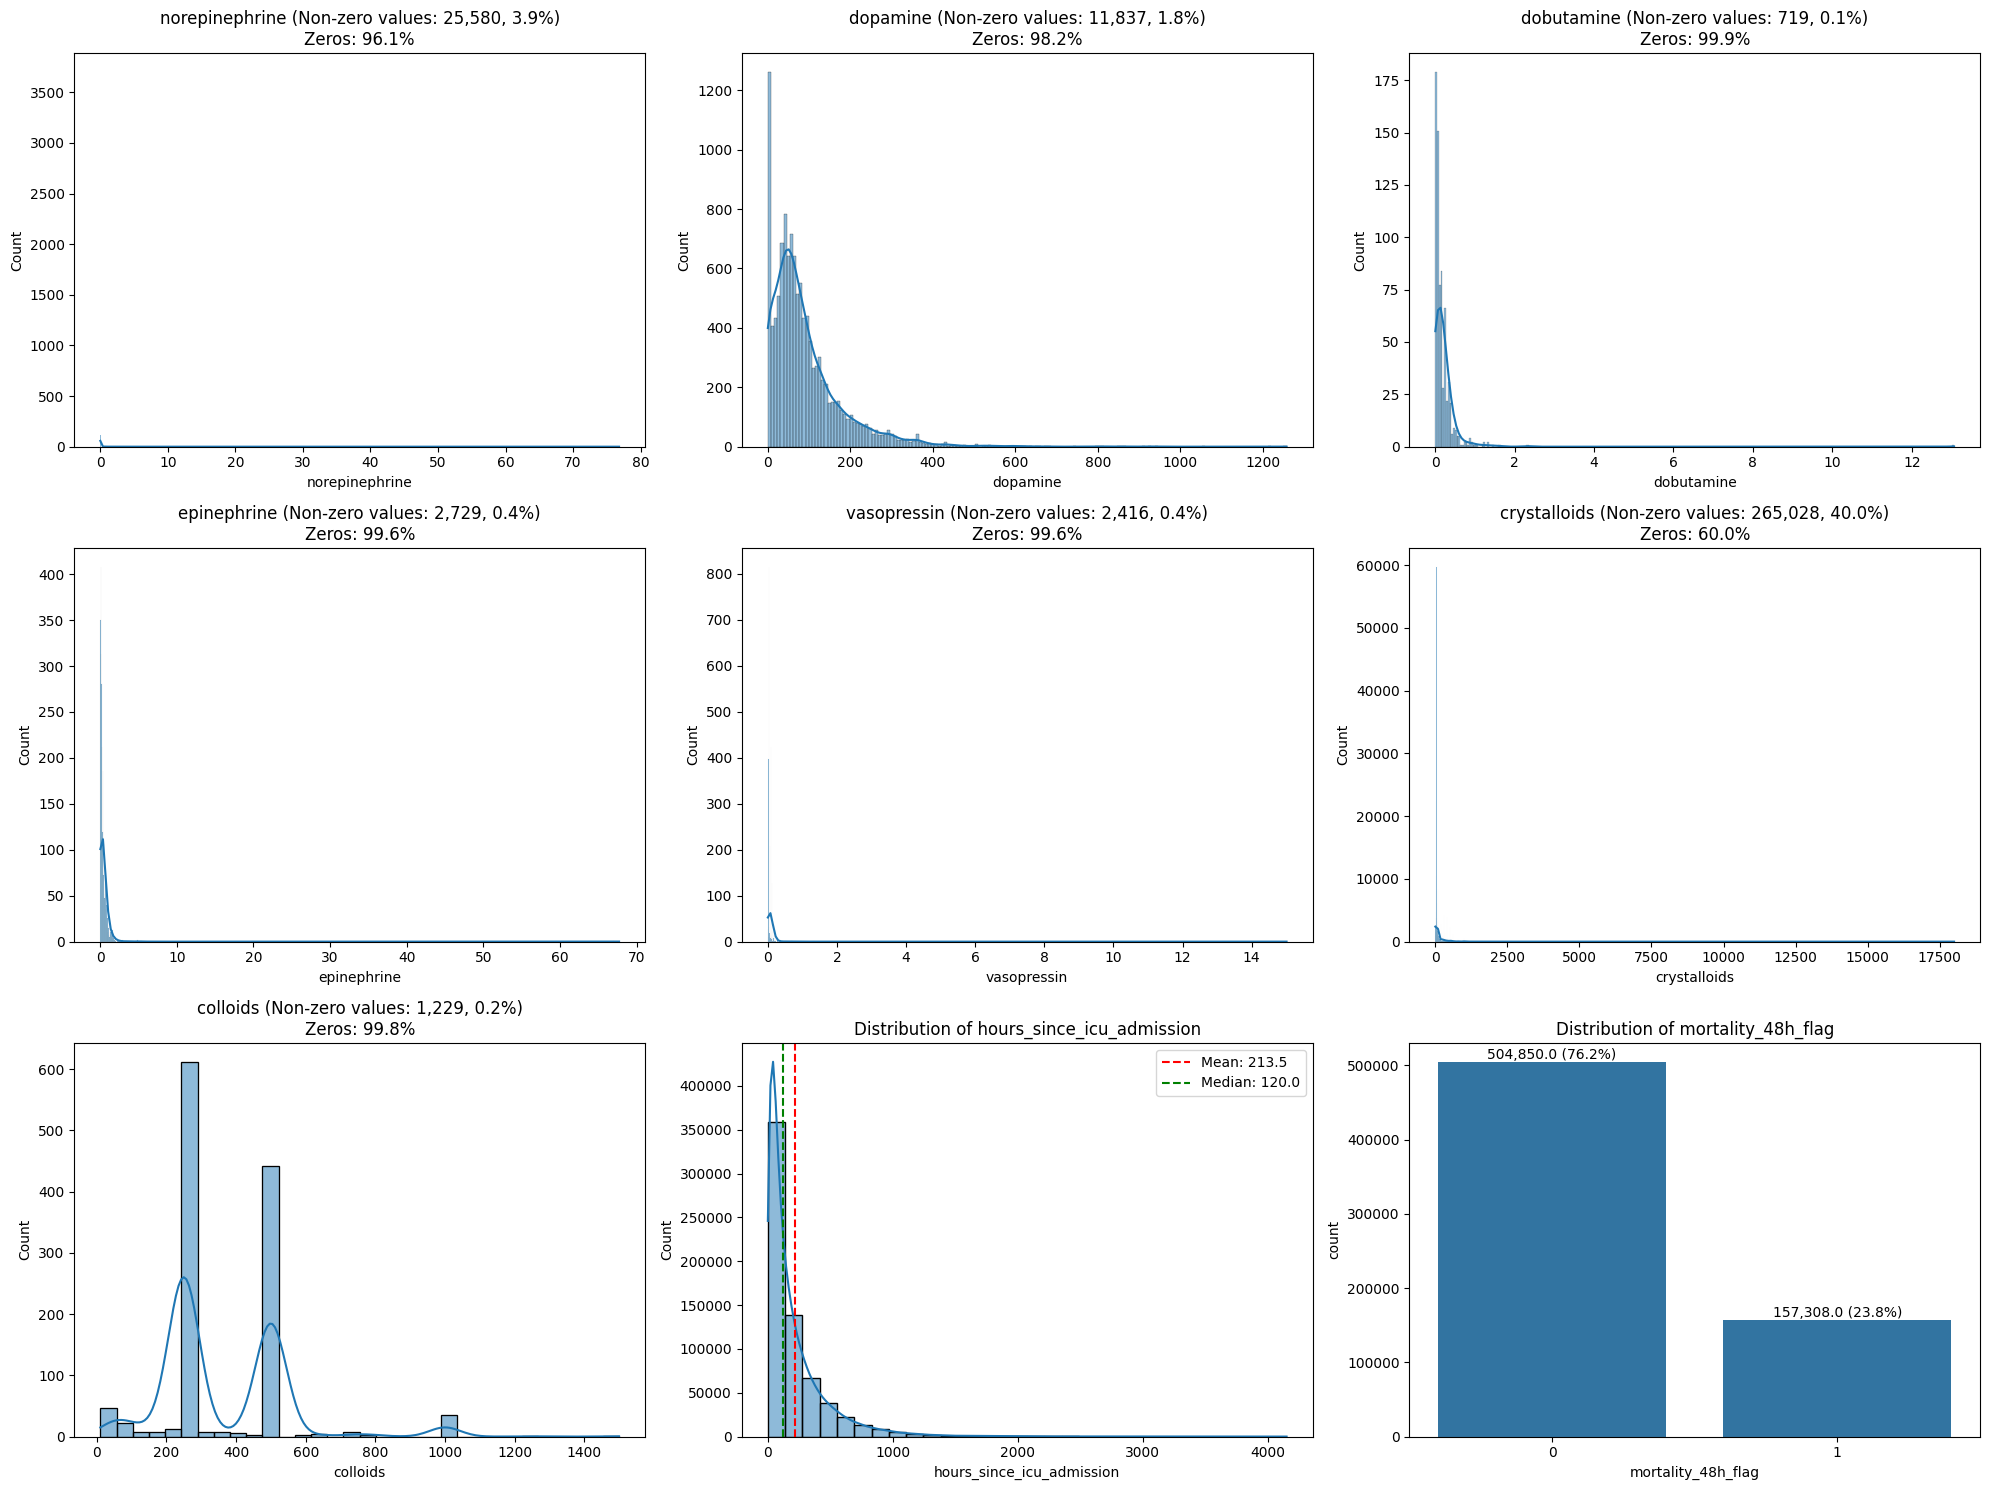

atats

norepinephrine:
Zero values: 636,578 (96.14%)
Non-zero values: 25,580 (3.86%)
Non-zero statistics:
count    25580.000000
mean         0.142155
std          0.948117
min          0.000012
25%          0.001500
50%          0.004167
75%          0.012579
max         76.808000
Name: norepinephrine, dtype: float64

dopamine:
Zero values: 650,321 (98.21%)
Non-zero values: 11,837 (1.79%)
Non-zero statistics:
count    11837.000000
mean        91.495981
std         91.508151
min          0.000058
25%         34.032001
50%         66.240001
75%        120.959998
max       1257.300000
Name: dopamine, dtype: float64

dobutamine:
Zero values: 661,439 (99.89%)
Non-zero values: 719 (0.11%)
Non-zero statistics:
count    719.000000
mean       0.202376
std        0.535548
min        0.005000
25%        0.049775
50%        0.117136
75%        0.250275
max       13.063484
Name: dobutamine, dtype: float64

epinephrine:
Zero values: 659,429 (99.59%)
Non-zero values: 2,729 (0.41%)
Non-zero statistics

In [15]:
columns_to_analyze = [
    'norepinephrine', 'dopamine', 'dobutamine', 'epinephrine', 
    'vasopressin', 'crystalloids', 'colloids', 
    'hours_since_icu_admission', 'mortality_48h_flag'
]

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

def zero_percentage(series):
    return (series == 0).mean() * 100

for i, col in enumerate(columns_to_analyze):
    ax = axes[i]
    
    # binary mortality flag
    if col == 'mortality_48h_flag':
        sns.countplot(x=col, data=df_no_missing, ax=ax)
        ax.set_title(f'Distribution of {col}', fontsize=12)
        
        # Calculate & display percentages
        counts = df_no_missing[col].value_counts(normalize=True) * 100
        for j, p in enumerate(ax.patches):
            percentage = counts[j] if j < len(counts) else 0
            ax.annotate(f'{p.get_height():,} ({percentage:.1f}%)', 
                       (p.get_x() + p.get_width()/2., p.get_height()), 
                       ha='center', va='bottom')
    
    # For continuous variables medications
    elif col in ['norepinephrine', 'dopamine', 'dobutamine', 'epinephrine', 'vasopressin', 'crystalloids', 'colloids']:
        # percentage of zeros
        zero_perc = zero_percentage(df_no_missing[col])
        
        # histogram for non-zero values
        non_zero_values = df_no_missing[df_no_missing[col] > 0][col]
        
        if len(non_zero_values) > 0:
            sns.histplot(non_zero_values, ax=ax, kde=True)
            ax.set_title(f'{col} (Non-zero values: {len(non_zero_values):,}, {100-zero_perc:.1f}%)\nZeros: {zero_perc:.1f}%', fontsize=12)
        else:
            ax.text(0.5, 0.5, f'All values are zero', ha='center', va='center')
            ax.set_title(f'{col} (100% zeros)', fontsize=12)
    
    # hours since ICU admission
    else:
        sns.histplot(df_no_missing[col], ax=ax, kde=True, bins=30)
        ax.set_title(f'Distribution of {col}', fontsize=12)
        
        # mean and median lines
        mean_val = df_no_missing[col].mean()
        median_val = df_no_missing[col].median()
        ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
        ax.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}')
        ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

print("atats")
for col in columns_to_analyze:
    print(f"\n{col}:")
    if col in ['norepinephrine', 'dopamine', 'dobutamine', 'epinephrine', 'vasopressin', 'crystalloids', 'colloids']:
        print(f"Zero values: {(df_no_missing[col] == 0).sum():,} ({zero_percentage(df_no_missing[col]):.2f}%)")
        print(f"Non-zero values: {(df_no_missing[col] > 0).sum():,} ({100-zero_percentage(df_no_missing[col]):.2f}%)")
        
        # stats for non-zero values
        non_zero = df_no_missing[df_no_missing[col] > 0][col]
        if len(non_zero) > 0:
            print(f"Non-zero statistics:")
            print(non_zero.describe())
    else:
        print(df_no_missing[col].describe())
    
    if col == 'mortality_48h_flag':
        mortality_counts = df_no_missing[col].value_counts(normalize=True) * 100
        print(f"\nMortality rate: {mortality_counts[1]:.2f}%")

### Observations:

1. **Gender Distribution**:
   - Male predominance (56.5%) compared to female patients (43.5%)
   - This gender imbalance aligns with clinical research suggesting males may be more susceptible to sepsis

2. **Ethnicity Distribution**:
   - White patients represent the majority (71.7%) of the dataset
   - Significant minority representation: Black (9.6%), Hispanic/Latino (2.6%), Asian (2.4%)
   - A substantial portion (13.6%) has unknown/unspecified ethnicity
   - Native American/Pacific Islander patients are notably underrepresented (0.1%)

3. **Age Distribution**:
   - Sepsis primarily affects older adults, with highest concentrations in the 71-80 age group
   - Clear trend of increasing sepsis incidence with advancing age until 80, then declining
   - Very few pediatric cases (0-18 age group)

#### Treatment Insights

1. **Vasopressor Usage**:
   - Norepinephrine is the most commonly used vasopressor (3.86% of cases)
   - Dopamine is used in 1.79% of cases, with higher dosing (mean 91.5 µg/kg/min)
   - Epinephrine (0.41%) and vasopressin (0.36%) are used less frequently
   - Dobutamine usage is rare (0.11% of cases)

2. **Fluid Resuscitation**:
   - Crystalloids are administered in a significant portion of cases (40.02%)
   - Colloids are rarely used (0.19%), but when used, typically at high volumes (mean 360ml)
   - The bimodal distribution of colloids suggests two standard dosing protocols (~250ml and ~500ml)

3. **Treatment Patterns**:
   - There's a clear preference hierarchy in vasopressor use: norepinephrine > dopamine > epinephrine > vasopressin > dobutamine
   - This aligns with clinical guidelines recommending norepinephrine as first-line therapy

#### Clinical Outcomes

1. **ICU Stay Duration**:
   - Mean ICU stay is 213.5 hours (~8.9 days)
   - Median stay is 120 hours (5 days), indicating a right-skewed distribution
   - 75% of patients stay less than 276 hours (~11.5 days)
   - The distribution shows many short stays with a long tail of extended cases

2. **Mortality**:
   - 48-hour mortality rate is 23.76%, indicating the severity of sepsis in this population
   - This is a critical outcome variable for predictive modeling

#### Clinical Implications

1. **Treatment Protocols**:
   - Current practice heavily favors crystalloids over colloids for fluid resuscitation
   - Norepinephrine dominates vasopressor therapy as recommended by guidelines
   - The high overall mortality rate (23.76%) highlights the need for improved early interventions

2. **Resource Planning**:
   - ICU resource allocation should account for the right-skewed distribution of stays
   - The significant percentage of patients requiring vasopressors (≈6.5% combined) indicates the prevalence of septic shock

3. **Population Focus**:
   - Interventions should particularly target the elderly population (60-80 years)
   - The male predominance suggests possible gender-specific risk factors or response patterns

In [16]:
df_no_missing.to_csv(r'data\sepsis_cleaned_no_missing.csv', index=False)

# 5. Analysis for data with missing values

In [17]:
missing_df.head()

,Missing Values,Percentage
hematocrit,603893,91.200741
respiratory_rate,593048,89.562914
peep,527265,79.628276
lactate,505223,76.299463
fio2,497458,75.126782


In [18]:
missing_df.shape

(43, 2)

In [19]:
# Display columns with missing values
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage
hematocrit,603893,91.200741
respiratory_rate,593048,89.562914
peep,527265,79.628276
lactate,505223,76.299463
fio2,497458,75.126782
height,455032,68.719550
bilirubin,430572,65.025568
gcs_total,426561,64.419821
spo2,398925,60.246195
map,397939,60.097288


### Observations
- So for this dataset we will only impute features which have <75% missing values as beyond this the data might generate artificial patterns; also it is a bit difficult for medical practicioners to accpet results on hihgly imputed dataset.

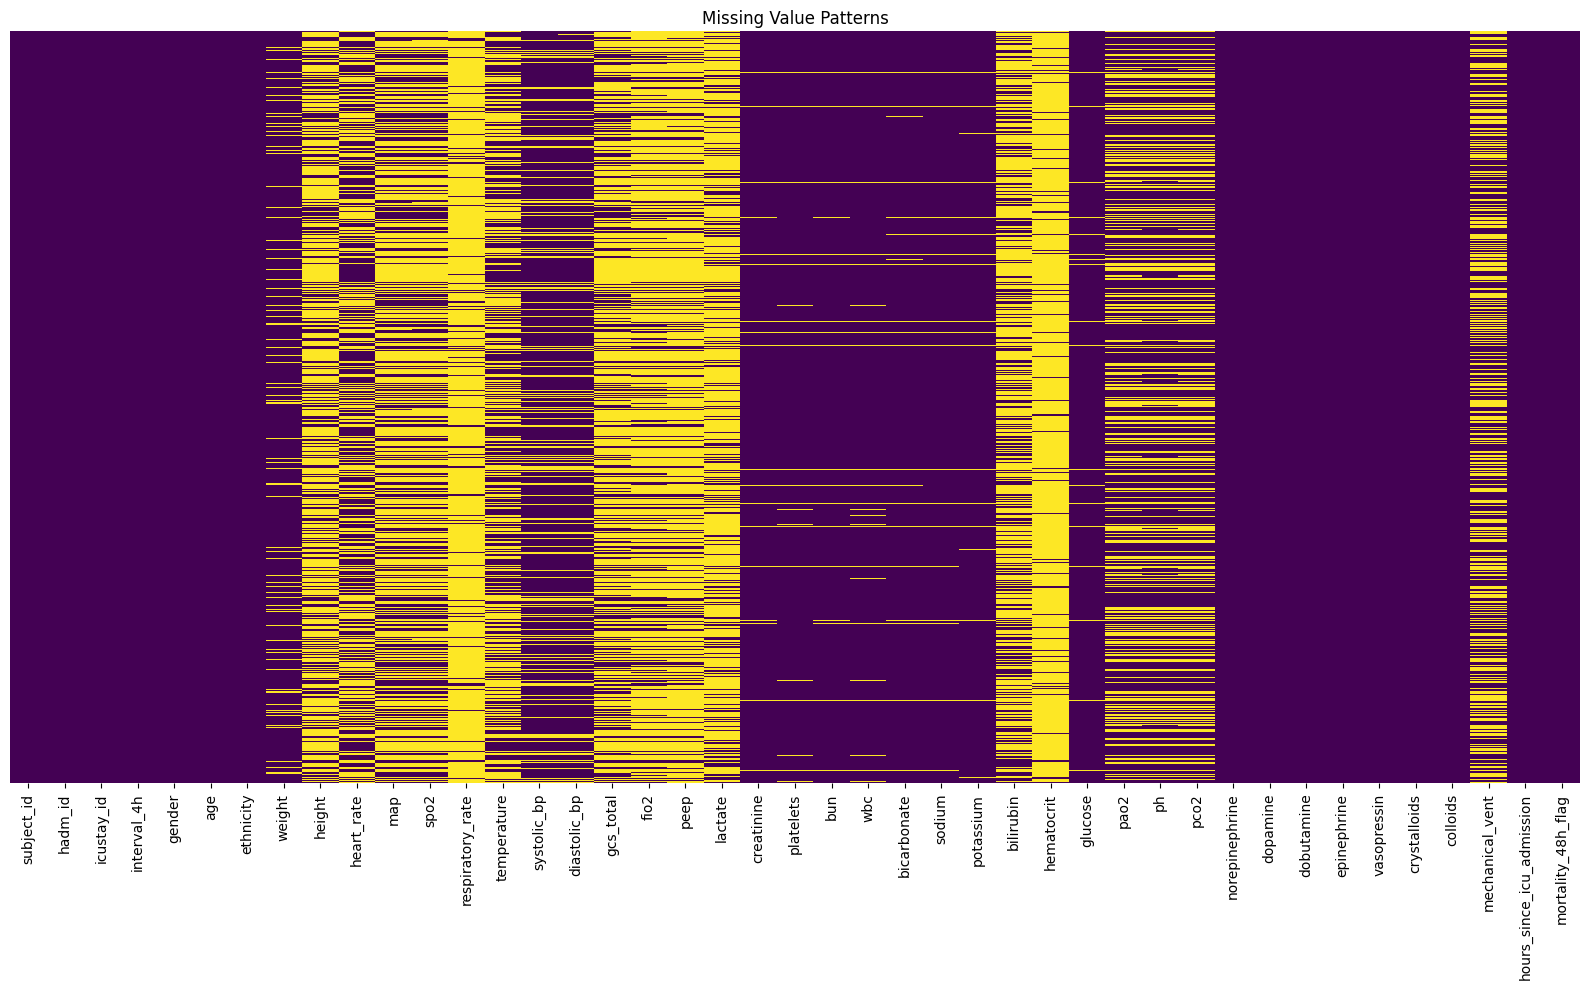

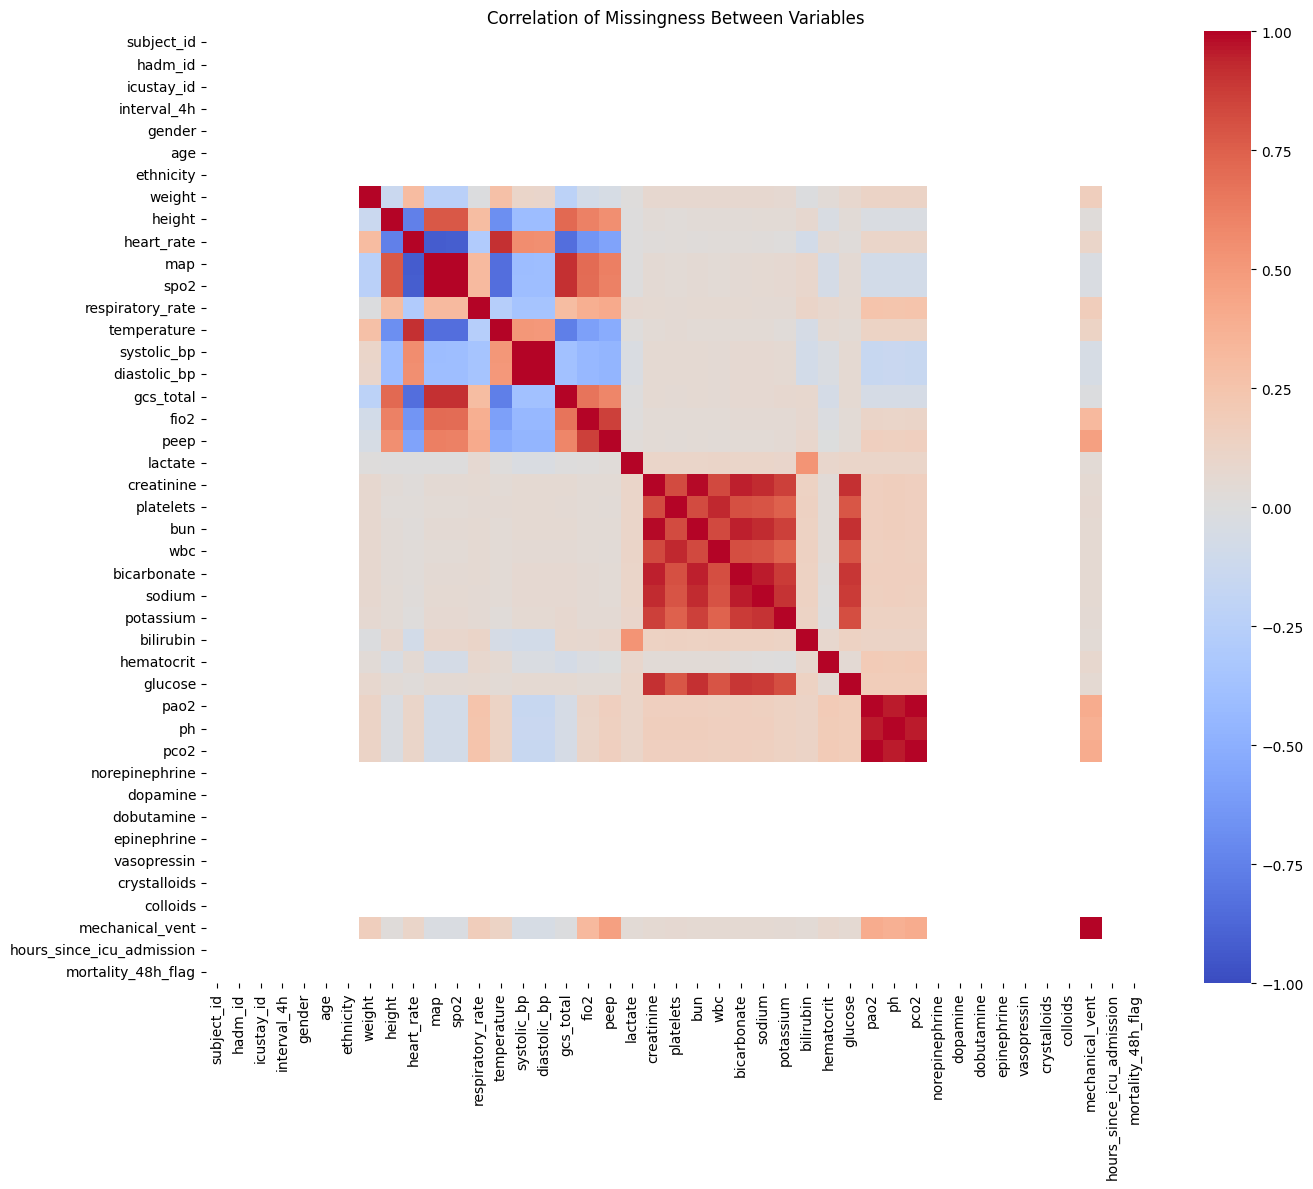

Age difference between patients with and without lactate measurements:
Mean age with lactate: 70.08
Mean age without lactate: 75.75
T-test p-value: 0.000000

Relationship between mortality and lactate measurement:
Chi-square p-value: 0.000000
mortality_48h_flag       0       1
lactate                           
False               375683  129540
True                129167   27768
lactate missing vs norepinephrine:
  Mean norepinephrine when lactate missing: 0.004198
  Mean norepinephrine when lactate present: 0.009657

lactate missing vs vasopressin:
  Mean vasopressin when lactate missing: 0.000259
  Mean vasopressin when lactate present: 0.000468

lactate missing vs mortality_48h_flag:
  Chi-square p-value: 0.000000
mortality_48h_flag       0       1
lactate_is_missing                
0                   129167   27768
1                   375683  129540

heart_rate missing vs norepinephrine:
  Mean norepinephrine when heart_rate missing: 0.001093
  Mean norepinephrine when heart_rate

In [20]:
from scipy.stats import chi2_contingency

# Create a heatmap of missing values
plt.figure(figsize=(16, 10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Value Patterns')
plt.tight_layout()
plt.show()

# Checking for relationships between missingness of different variables

# matrix of missingness correlations
missing_binary = df.isnull().astype(int)
missing_corr = missing_binary.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(missing_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Missingness Between Variables')
plt.tight_layout()
plt.show()

# Checking if missingness is related to observed variables (MAR test)
# Checking if lactate missingness is related to age or mortality
has_lactate = ~df['lactate'].isnull()

# T-test for age difference between those with and without lactate measurements
from scipy.stats import ttest_ind
age_with_lactate = df[has_lactate]['age']
age_without_lactate = df[~has_lactate]['age']
t_stat, p_value = ttest_ind(age_with_lactate, age_without_lactate)
print(f"Age difference between patients with and without lactate measurements:")
print(f"Mean age with lactate: {age_with_lactate.mean():.2f}")
print(f"Mean age without lactate: {age_without_lactate.mean():.2f}")
print(f"T-test p-value: {p_value:.6f}")

# Chi-square test for relationship between mortality and lactate measurement
contingency_table = pd.crosstab(has_lactate, df['mortality_48h_flag'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nRelationship between mortality and lactate measurement:")
print(f"Chi-square p-value: {p:.6f}")
print(contingency_table)

# definign a missingness indicator matrix for key variables
key_vars = ['lactate', 'heart_rate', 'map', 'temperature', 'mechanical_vent']
for var in key_vars:
    df[f'{var}_is_missing'] = df[var].isnull().astype(int)

# Checking relationship between missingness and severity indicators
severity_vars = ['norepinephrine', 'vasopressin', 'mortality_48h_flag']
for missing_var in key_vars:
    for severity_var in severity_vars:
        missing_indicator = f'{missing_var}_is_missing'
        
        # For continuous severity variables
        if severity_var != 'mortality_48h_flag':
            # Compare mean values
            mean_when_missing = df[df[missing_indicator] == 1][severity_var].mean()
            mean_when_present = df[df[missing_indicator] == 0][severity_var].mean()
            print(f"{missing_var} missing vs {severity_var}:")
            print(f"  Mean {severity_var} when {missing_var} missing: {mean_when_missing:.6f}")
            print(f"  Mean {severity_var} when {missing_var} present: {mean_when_present:.6f}")
        
        # For binary severity variables (like mortality)
        else:
            # Creating contingency table
            cont_table = pd.crosstab(df[missing_indicator], df[severity_var])
            chi2, p, dof, expected = chi2_contingency(cont_table)
            print(f"{missing_var} missing vs {severity_var}:")
            print(f"  Chi-square p-value: {p:.6f}")
            print(cont_table)
        print()

### Observation from Missingness Analysis

1. Clear Patterns of Missingness (Not MCAR):
    - The heatmap shows distinct patterns rather than random distribution
    - Strong correlations between missingness of related variables (e.g., blood gas measurements pO2, pCO2, and pH show similar patterns)
    - The second correlation heatmap shows clusters of correlated missingness, particularly among lab values


2. Evidence of MAR (Missing At Random):
    - Significant age difference between patients with and without lactate measurements (70.08 vs 75.75 years)
    - This suggests older patients are less likely to have lactate measured, controlling for severity

3. Strong Evidence of MNAR (Missing Not At Random):
    - Significant relationship between mortality and measurement patterns
    - Patients without mechanical ventilation data are much more likely to die (mortality rate of 39.7% vs 9.8%)
    - Vasopressor use (norepinephrine, vasopressin) correlates with whether measurements were taken
    - These suggest clinical decision-making drives which tests are ordered

4. Distinct Missingness Clusters:
    - Vital signs (heart_rate, map, spo2) tend to be missing together
    - Laboratory values (creatinine, platelets, bun, etc.) show correlated missingness
    - Respiratory measurements (fio2, peep) are often missing together

# 6. Performing Imputations

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 1. Pre-phase: Define clinical features and acceptable ranges
def define_clinical_ranges():
    """Define physiologically acceptable ranges for clinical variables"""
    return {
        'heart_rate': (30, 200),       # beats per minute
        'map': (40, 150),              # mean arterial pressure
        'spo2': (70, 100),             # oxygen saturation
        'respiratory_rate': (5, 60),   # breaths per minute
        'temperature': (33, 42),       # celsius
        'systolic_bp': (60, 220),      # systolic blood pressure
        'diastolic_bp': (30, 120),     # diastolic blood pressure
        'gcs_total': (3, 15),          # Glasgow Coma Scale
        'creatinine': (0.2, 10),       # creatinine level
        'platelets': (5, 1000),        # platelet count
        'bun': (1, 150),               # blood urea nitrogen
        'wbc': (0.5, 50),              # white blood cell count
        'bicarbonate': (5, 50),        # bicarbonate level
        'sodium': (110, 170),          # sodium level
        'potassium': (2, 8),           # potassium level
        'bilirubin': (0, 30),          # bilirubin level
        'glucose': (20, 600),          # glucose level
        'pao2': (30, 500),             # partial pressure of oxygen
        'pco2': (15, 100),             # partial pressure of carbon dioxide
        'ph': (6.8, 7.8),              # pH level
        'lactate': (0.5, 20),          # lactate level
    }

# Load the data
print("Loading data...")
df = pd.read_csv('data/sepsis_cohort_features.csv')

# Apply ethnicity binning
ethnicity_mapping = {
    # White categories
    'WHITE': 'WHITE',
    'WHITE - RUSSIAN': 'WHITE',
    'WHITE - BRAZILIAN': 'WHITE',
    'WHITE - OTHER EUROPEAN': 'WHITE',
    'WHITE - EASTERN EUROPEAN': 'WHITE',
    'PORTUGUESE': 'WHITE',
    
    # Black categories
    'BLACK/AFRICAN AMERICAN': 'BLACK',
    'BLACK/CAPE VERDEAN': 'BLACK',
    'BLACK/HAITIAN': 'BLACK',
    'BLACK/AFRICAN': 'BLACK',
    
    # Asian categories
    'ASIAN': 'ASIAN',
    'ASIAN - CHINESE': 'ASIAN',
    'ASIAN - ASIAN INDIAN': 'ASIAN',
    'ASIAN - VIETNAMESE': 'ASIAN',
    'ASIAN - CAMBODIAN': 'ASIAN',
    'ASIAN - FILIPINO': 'ASIAN',
    'ASIAN - OTHER': 'ASIAN',
    'ASIAN - KOREAN': 'ASIAN',
    'ASIAN - JAPANESE': 'ASIAN',
    
    # Hispanic/Latino categories
    'HISPANIC OR LATINO': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - PUERTO RICAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - DOMINICAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - CUBAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - COLOMBIAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - MEXICAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - GUATEMALAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - SALVADORAN': 'HISPANIC/LATINO',
    'HISPANIC/LATINO - HONDURAN': 'HISPANIC/LATINO',
    
    # Native categories
    'AMERICAN INDIAN/ALASKA NATIVE': 'NATIVE AMERICAN/PACIFIC ISLANDER',
    'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE': 'NATIVE AMERICAN/PACIFIC ISLANDER',
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'NATIVE AMERICAN/PACIFIC ISLANDER',
    
    # Unknown/Other categories
    'UNKNOWN/NOT SPECIFIED': 'UNKNOWN/OTHER',
    'OTHER': 'UNKNOWN/OTHER',
    'UNABLE TO OBTAIN': 'UNKNOWN/OTHER',
    'PATIENT DECLINED TO ANSWER': 'UNKNOWN/OTHER',
    'MIDDLE EASTERN': 'UNKNOWN/OTHER',
    'MULTI RACE ETHNICITY': 'UNKNOWN/OTHER'
}

# Apply ethnicity mapping to df
print("Processing categorical variables...")
df['ethnicity_simplified'] = df['ethnicity'].map(ethnicity_mapping)

# Convert categorical variables to numeric
df['gender_code'] = df['gender'].map({'M': 0, 'F': 1})
ethnicity_codes = {val: idx for idx, val in enumerate(df['ethnicity_simplified'].dropna().unique())}
df['ethnicity_code'] = df['ethnicity_simplified'].map(ethnicity_codes)

# Identify missing values
missing_percent = df.isnull().mean() * 100
high_missing_cols = missing_percent[missing_percent > 70].index.tolist()
moderate_missing_cols = [col for col in missing_percent[(missing_percent > 30) & (missing_percent <= 70)].index]

print(f"Excluding variables with >70% missing values: {high_missing_cols}")

# 2. Organize variables by type
# ID variables (not to be imputed)
id_vars = ['subject_id', 'hadm_id', 'icustay_id', 'interval_4h']

# Categorical variables (already converted to numeric)
cat_vars = ['gender_code', 'ethnicity_code']

# Vital signs
vitals = ['heart_rate', 'map', 'spo2', 'temperature', 'respiratory_rate',
          'systolic_bp', 'diastolic_bp', 'gcs_total']
vitals = [v for v in vitals if v not in high_missing_cols]

# Lab values
labs = ['creatinine', 'platelets', 'bun', 'wbc', 'bicarbonate', 'sodium',
        'potassium', 'bilirubin', 'glucose']
labs = [l for l in labs if l not in high_missing_cols]

# Blood gases
gases = ['pao2', 'pco2', 'ph', 'lactate']
gases = [g for g in gases if g not in high_missing_cols]

# Treatment variables
treatments = ['norepinephrine', 'dopamine', 'dobutamine', 'epinephrine',
              'vasopressin', 'crystalloids', 'colloids']

# Other variables
other_vars = ['age', 'weight', 'height', 'fio2', 'peep',
              'hours_since_icu_admission', 'mechanical_vent', 'mortality_48h_flag']
other_vars = [o for o in other_vars if o not in high_missing_cols]

# Create missingness indicators for clinically important variables
clinical_missing = ['lactate', 'mechanical_vent', 'pao2', 'pco2', 'ph'] + moderate_missing_cols
clinical_missing = [col for col in clinical_missing if col in df.columns]

print("Creating missingness indicators...")
for col in tqdm(clinical_missing, desc="Creating missing flags"):
    df[f'{col}_measured'] = (~df[col].isnull()).astype(int)

# 3. Imputation Strategy
# Function to downsample for faster KNN imputation
def sample_for_imputation(df, feature, sample_size=10000):
    """Create a representative sample for KNN imputation"""
    # Split into missing and non-missing
    missing = df[df[feature].isnull()]
    non_missing = df[~df[feature].isnull()]
    
    # If non-missing is smaller than sample_size, use all
    if len(non_missing) <= sample_size:
        sampled_non_missing = non_missing
    else:
        # Stratify by important clinical factors if possible
        strat_cols = ['gender_code', 'mortality_48h_flag']
        try:
            _, sampled_non_missing = train_test_split(
                non_missing, 
                train_size=sample_size,
                stratify=non_missing[strat_cols],
                random_state=42
            )
        except:
            # If stratification fails, just take a random sample
            sampled_non_missing = non_missing.sample(sample_size, random_state=42)
    
    # For missing values, take a sample or all if smaller than sample_size
    if len(missing) <= sample_size:
        sampled_missing = missing
    else:
        sampled_missing = missing.sample(sample_size, random_state=42)
    
    # Combine samples
    return pd.concat([sampled_non_missing, sampled_missing])

# Function for random forest imputation
def rf_impute(df, target_col, predictor_cols, n_estimators=50, max_depth=10):
    """Impute using Random Forest"""
    # Get train data (non-missing values)
    train_data = df.dropna(subset=[target_col])
    
    # Skip if no missing values or insufficient data
    if df[target_col].isnull().sum() == 0 or len(train_data) < 100:
        return df[target_col].copy()
    
    # Prepare data
    X_train = train_data[predictor_cols].copy()
    y_train = train_data[target_col].copy()
    
    # Train a Random Forest model
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                              n_jobs=-1, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predict missing values
    missing_idx = df[target_col].isnull()
    X_missing = df.loc[missing_idx, predictor_cols].copy()
    
    # Only impute if there are missing values
    if len(X_missing) > 0:
        predictions = rf.predict(X_missing)
        
        # Create a new series with the original values
        imputed_series = df[target_col].copy()
        
        # Update only the missing values with predictions
        imputed_series.loc[missing_idx] = predictions
        
        return imputed_series
    
    return df[target_col].copy()

# Function to enforce clinical range constraints
def enforce_clinical_ranges(df, ranges):
    """Enforce clinical range constraints on imputed values"""
    for col, (min_val, max_val) in ranges.items():
        if col in df.columns:
            # Get indices where values are outside the valid range
            below_min = df[col] < min_val
            above_max = df[col] > max_val
            
            # Replace values below minimum with minimum
            if below_min.any():
                df.loc[below_min, col] = min_val
                
            # Replace values above maximum with maximum
            if above_max.any():
                df.loc[above_max, col] = max_val
    
    return df

# 4. Main Imputation Process
def impute_dataset(df):
    """Main imputation function that combines methods"""
    print("Starting imputation process...")
    df_imputed = df.copy()
    clinical_ranges = define_clinical_ranges()
    
    # Define columns to be imputed
    numerical_cols = vitals + labs + gases + [col for col in other_vars if col not in id_vars]
    numerical_cols = [col for col in numerical_cols if col in df.columns]
    
    # 1. Simple imputation for variables with low missingness (< 5%)
    simple_impute_cols = [col for col in numerical_cols 
                         if df[col].isnull().mean() < 0.05 and col not in gases]
    
    if simple_impute_cols:
        print("Performing simple imputation for columns with low missingness...")
        imputer = SimpleImputer(strategy='median')
        df_imputed[simple_impute_cols] = imputer.fit_transform(df_imputed[simple_impute_cols])
    
    # 2. KNN imputation for lab values using sampling approach
    print("Performing KNN imputation for lab values...")
    for col in tqdm(labs, desc="KNN imputation"):
        if col in df_imputed.columns and df_imputed[col].isnull().sum() > 0:
            # Choose predictor features for this lab
            predictors = [c for c in ['age', 'gender_code', 'creatinine', 'sodium', 
                                     'potassium', 'glucose', 'mortality_48h_flag'] 
                         if c in df_imputed.columns and c != col]
            
            # Create a sample for imputation
            sample = sample_for_imputation(df_imputed, col)
            
            # Standardize features for KNN
            scaler = StandardScaler()
            sample_scaled = sample.copy()
            sample_scaled[predictors] = scaler.fit_transform(sample[predictors])
            
            # Apply KNN imputation on the sample
            imputer = KNNImputer(n_neighbors=5, weights='distance')
            cols_to_impute = [col] + predictors
            imputed_sample = sample_scaled[cols_to_impute].copy()
            imputed_sample = pd.DataFrame(
                imputer.fit_transform(imputed_sample),
                columns=cols_to_impute,
                index=imputed_sample.index
            )
            
            # Train a RandomForest on the imputed sample to predict for the entire dataset
            missing_idx = df_imputed[col].isnull()
            if missing_idx.sum() > 0:
                # Use the imputed values from the sample to train RF
                rf_train = sample_scaled.copy()
                rf_train.loc[rf_train[col].isnull(), col] = imputed_sample.loc[rf_train[col].isnull(), col]
                
                # Train RF and predict
                rf = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
                rf.fit(rf_train[predictors], rf_train[col])
                df_imputed.loc[missing_idx, col] = rf.predict(df_imputed.loc[missing_idx, predictors])
    
    # 3. Random Forest for vitals with clinical knowledge
    print("Performing Random Forest imputation for vital signs...")
    for col in tqdm(vitals, desc="RF imputation"):
        if col in df_imputed.columns and df_imputed[col].isnull().sum() > 0:
            # Choose predictors for this vital sign
            predictors = [c for c in ['age', 'gender_code', 'systolic_bp', 'diastolic_bp',
                                     'heart_rate', 'map', 'spo2', 'temperature', 
                                     'hours_since_icu_admission', 'mortality_48h_flag'] + treatments
                         if c in df_imputed.columns and c != col and df_imputed[c].isnull().sum() == 0]
            
            # Impute using RF
            df_imputed[col] = rf_impute(df_imputed, col, predictors)
    
    # 4. Blood gases - conditional imputation based on clinical presentation
    print("Performing conditional imputation for blood gases...")
    for col in tqdm(gases, desc="Gas imputation"):
        if col in df_imputed.columns and df_imputed[col].isnull().sum() > 0:
            # Different approach: impute only where measured
            measured_indicator = f'{col}_measured'
            if measured_indicator in df_imputed.columns:
                # Only impute where the indicator suggests it would be measured
                rows_to_impute = (df_imputed[measured_indicator] == 1) & df_imputed[col].isnull()
                
                if rows_to_impute.sum() > 0:
                    # For these rows, use strategic predictors
                    predictors = [c for c in ['age', 'gender_code', 'heart_rate', 'map', 
                                             'respiratory_rate', 'mortality_48h_flag', 
                                             'mechanical_vent', 'norepinephrine'] 
                                 if c in df_imputed.columns and df_imputed[c].isnull().sum() == 0]
                    
                    # Use domain knowledge for gas imputation
                    if 'mechanical_vent' in df_imputed.columns:
                        # Create temporary groups for conditional imputation
                        vent_groups = df_imputed.loc[~df_imputed[col].isnull(), 'mechanical_vent'].fillna(0).astype(int)
                        
                        # Get conditional means based on ventilation status
                        vent_means = df_imputed.loc[~df_imputed[col].isnull()].groupby(vent_groups)[col].median()
                        
                        # Apply conditional imputation where possible
                        for vent_status, mean_val in vent_means.items():
                            mask = rows_to_impute & (df_imputed['mechanical_vent'].fillna(0).astype(int) == vent_status)
                            if mask.sum() > 0:
                                df_imputed.loc[mask, col] = mean_val
                    
                    # For remaining missing values, use RF
                    still_missing = (df_imputed[measured_indicator] == 1) & df_imputed[col].isnull()
                    if still_missing.sum() > 0:
                        df_imputed[col] = rf_impute(df_imputed, col, predictors)
            else:
                # Fall back to standard RF imputation
                predictors = [c for c in ['age', 'gender_code', 'heart_rate', 'respiratory_rate',
                                         'mortality_48h_flag', 'hours_since_icu_admission'] 
                             if c in df_imputed.columns and df_imputed[c].isnull().sum() == 0]
                df_imputed[col] = rf_impute(df_imputed, col, predictors)
    
    # 5. Handle any remaining missing values with median imputation
    remaining_null = df_imputed[numerical_cols].isnull().sum()
    remaining_null = remaining_null[remaining_null > 0]
    
    if len(remaining_null) > 0:
        print(f"Imputing remaining missing values with median: {remaining_null.index.tolist()}")
        for col in remaining_null.index:
            median_val = df_imputed[col].median()
            df_imputed[col].fillna(median_val, inplace=True)
    
    # 6. Enforce clinical range constraints
    print("Enforcing clinical range constraints...")
    df_imputed = enforce_clinical_ranges(df_imputed, clinical_ranges)
    
    return df_imputed

# Execute the imputation
df_final = impute_dataset(df)

# Get the columns to keep in the final dataset
cols_to_keep = id_vars + ['gender', 'ethnicity', 'ethnicity_simplified'] + \
               vitals + labs + gases + treatments + other_vars + \
               [col for col in df_final.columns if '_measured' in col]

# Ensure all columns exist
cols_to_keep = [col for col in cols_to_keep if col in df_final.columns]
cols_to_keep = list(set(cols_to_keep))  # Remove duplicates

# Create final dataset
df_final = df_final[cols_to_keep].copy()

# Print information about the imputed dataset
print("\nImputation complete. Summary of final dataset:")
print(f"Original shape: {df.shape}")
print(f"Final shape after imputation: {df_final.shape}")
print(f"Number of columns excluded due to high missingness: {len(high_missing_cols)}")
print(f"Number of missingness indicator columns: {len([col for col in df_final.columns if '_measured' in col])}")

# Save the imputed dataset
df_final.to_csv('sepsis_imputed.csv', index=False)
print("Imputed dataset saved as 'sepsis_imputed.csv'")

# Validation - Check for any remaining missing values
remaining_nulls = df_final.isnull().sum()
if remaining_nulls.sum() > 0:
    print("Warning: There are still missing values in the dataset:")
    print(remaining_nulls[remaining_nulls > 0])
else:
    print("Validation successful: No missing values remain in the dataset.")

Loading data...
Processing categorical variables...
Excluding variables with >70% missing values: ['respiratory_rate', 'fio2', 'peep', 'lactate', 'hematocrit']
Creating missingness indicators...


Creating missing flags:   0%|          | 0/16 [00:00<?, ?it/s]

Starting imputation process...
Performing simple imputation for columns with low missingness...
Performing KNN imputation for lab values...


KNN imputation:   0%|          | 0/9 [00:00<?, ?it/s]

Performing Random Forest imputation for vital signs...


RF imputation:   0%|          | 0/7 [00:00<?, ?it/s]

Performing conditional imputation for blood gases...


Gas imputation:   0%|          | 0/3 [00:00<?, ?it/s]

Imputing remaining missing values with median: ['pao2', 'pco2', 'ph', 'weight', 'height', 'mechanical_vent']
Enforcing clinical range constraints...

Imputation complete. Summary of final dataset:
Original shape: (662158, 58)
Final shape after imputation: (662158, 51)
Number of columns excluded due to high missingness: 5
Number of missingness indicator columns: 12
Imputed dataset saved as 'sepsis_imputed.csv'
Validation successful: No missing values remain in the dataset.
